In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV directly from the URL
url = "https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/vaccination/aefi.csv"
data = pd.read_csv(url)

# Convert the 'date' column to datetime, allowing mixed formats
data['date'] = pd.to_datetime(data['date'], dayfirst=True, errors='coerce')

# Define the date range
start_date = '2021-04-01'
end_date = '2021-10-01'

# Filter the data within the specified date range
filtered_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]

# Keep only the required columns
columns_to_keep = [
    'date', 'vaxtype', 'daily_total', 'daily_serious_npra', 'daily_nonserious_npra', 
    'd1_site_pain', 'd2_site_pain', 'd1_headache', 'd2_headache', 'd1_fever', 'd2_fever'
]

filtered_data = filtered_data[columns_to_keep]

# Display the filtered data
print(filtered_data.head(5))


         date  vaxtype  daily_total  daily_serious_npra  \
38 2021-04-01   pfizer         2051                   6   
39 2021-04-01  sinovac            1                   0   
40 2021-04-02   pfizer         1049                   7   
41 2021-04-02  sinovac            1                   0   
42 2021-04-03   pfizer          592                   4   

    daily_nonserious_npra  d1_site_pain  d2_site_pain  d1_headache  \
38                    253          1046           168          550   
39                      1             0             0            0   
40                    124           584            51          307   
41                      1             0             0            0   
42                     11           349            33          185   

    d2_headache  d1_fever  d2_fever  
38          137       137        80  
39            0         0         0  
40           35        93        10  
41            0         0         0  
42           28        57        1

C:\Users\cheng\AppData\Local\Temp\ipykernel_8088\2895848960.py:11: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  data['date'] = pd.to_datetime(data['date'], dayfirst=True, errors='coerce')


In [ ]:
###EDA part

In [10]:
obj = (filtered_data.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))
# check for any categorical variables

Categorical variables: 1


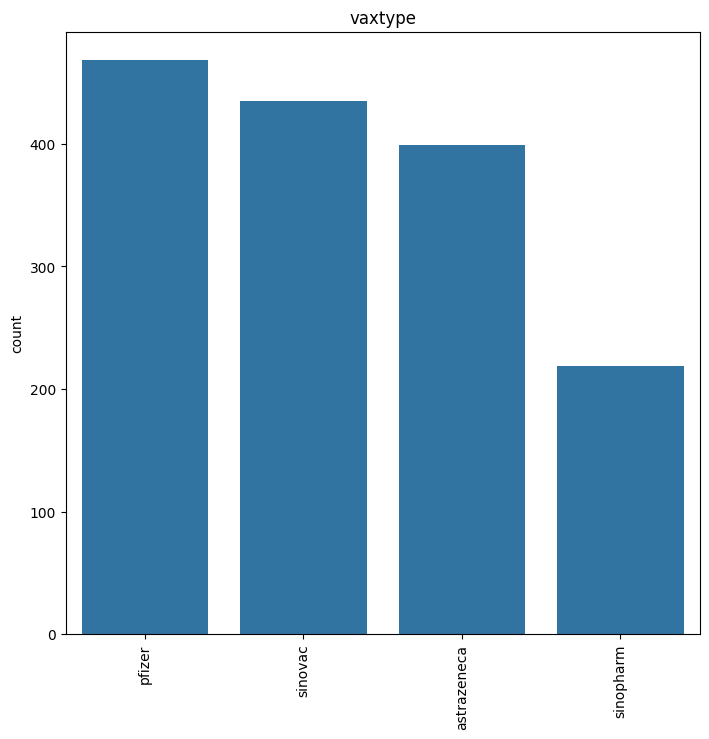

In [13]:
obj = (filtered_data.dtypes == 'object') 
object_cols = list(obj[obj].index) 
plt.figure(figsize=(18,36)) 
index = 1
  
for col in object_cols: 
  y = data[col].value_counts() 
  plt.subplot(4,2,index) 
  plt.xticks(rotation=90) 
  sns.barplot(x=list(y.index), y=y) 
  plt.title(col)
  index +=1